In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skvideo.io
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.morphology import dilation
import numpy

# skvideo fix
numpy.float = numpy.float64
numpy.int = numpy.int_

In [12]:
def draw_bbox(ax, bbox):
    minr, minc, maxr, maxc = bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-g', linewidth=2.5)

In [8]:
frames = skvideo.io.vread("/home/alex/Downloads/east_parking_reduced_size.mp4")

7


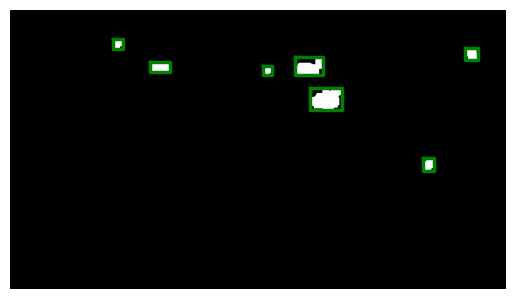

In [17]:
idx = 400
threshold = 0.05

ppframe = rgb2gray(frames[idx-2])
pframe = rgb2gray(frames[idx-1])
cframe = rgb2gray(frames[idx])
diff1 = np.abs(cframe - pframe)
diff2 = np.abs(pframe - ppframe)

motion_frame = np.minimum(diff1, diff2)
thresh_frame = motion_frame > threshold
dilated_frame = dilation(thresh_frame, np.ones((9, 9)))
label_frame = label(dilated_frame)
regions = regionprops(label_frame)

print(len(regions))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(dilated_frame, cmap='gray')
ax.set_axis_off()
ax.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

for r in regions:
    draw_bbox(ax, r.bbox)
    
# plt.savefig("/home/alex/Downloads/filename.pdf", bbox_inches = 'tight',
#     pad_inches = 0)